# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


In [3]:
cities

['kodiak',
 'hualmay',
 'cape town',
 'puerto ayora',
 'hilo',
 'lagoa',
 'oistins',
 'umzimvubu',
 'provideniya',
 'lebu',
 'padang',
 'chumikan',
 'dikson',
 'hermanus',
 'cherskiy',
 'atuona',
 'ampanihy',
 'saldanha',
 'los llanos de aridane',
 'pirovskoye',
 'kapaa',
 'butaritari',
 'ostrovnoy',
 'kruisfontein',
 'shingu',
 'ushuaia',
 'mendi',
 'nikolskoye',
 'tautira',
 'dzhusaly',
 'albany',
 'lata',
 'qaanaaq',
 'vila velha',
 'aflu',
 'arriana',
 'hirara',
 'illoqqortoormiut',
 'half moon bay',
 'gazanjyk',
 'chagda',
 'sentyabrskiy',
 'mount isa',
 'belushya guba',
 'srikakulam',
 'taoudenni',
 'rikitea',
 'kirksville',
 'hobart',
 'port alfred',
 'vaini',
 'klaksvik',
 'sampit',
 'lasa',
 'punta arenas',
 'yumen',
 'taolanaro',
 'barrow',
 'shimoda',
 'bluff',
 'blonduos',
 'grand river south east',
 'kailua',
 'saint-francois',
 'carnarvon',
 'hithadhoo',
 'marsabit',
 'lianran',
 'saleaula',
 'bonavista',
 'pangody',
 'apatity',
 'itirapina',
 'anar darreh',
 'arraial do 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Starting URL for Weather Map API call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
# Print (url)


# List of City Data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 15)


# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in list
for index, city in enumerate(cities):
    # Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass
    # Indicate that data loading is complete
        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")
        

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | hualmay
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | lagoa
Processing Record 7 of Set 1 | oistins
Processing Record 8 of Set 1 | umzimvubu
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 9 of Set 1 | provideniya
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | padang
Processing Record 12 of Set 1 | chumikan
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | cherskiy
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | ampanihy
Processing Record 18 of Set 1 | saldanha
Processing Record 19 of Set 1 | los llanos de aridane
Processing Record 20 of Set 1 | pirovskoye
Processing Record 21 of Set 1 | kapaa
Proces

Processing Record 48 of Set 3 | kamenka
Processing Record 49 of Set 3 | ribeira grande
Processing Record 0 of Set 4 | tuatapere
Processing Record 1 of Set 4 | jamestown
Processing Record 2 of Set 4 | chapais
Processing Record 3 of Set 4 | katsuura
Processing Record 4 of Set 4 | fortuna
Processing Record 5 of Set 4 | tiksi
Processing Record 6 of Set 4 | ust-barguzin
Processing Record 7 of Set 4 | tromso
Processing Record 8 of Set 4 | tagusao
Processing Record 9 of Set 4 | kaitangata
Processing Record 10 of Set 4 | yaan
Processing Record 11 of Set 4 | tawnat
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 12 of Set 4 | allen
Processing Record 13 of Set 4 | codrington
Processing Record 14 of Set 4 | rapid valley
Processing Record 15 of Set 4 | praia da vitoria
Processing Record 16 of Set 4 | bolungarvik
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Recor

Processing Record 22 of Set 7 | hobyo
Processing Record 23 of Set 7 | jacareacanga
Processing Record 24 of Set 7 | pisco
Processing Record 25 of Set 7 | general roca
Processing Record 26 of Set 7 | yamada
Processing Record 27 of Set 7 | toora-khem
Processing Record 28 of Set 7 | mari
Processing Record 29 of Set 7 | mitsamiouli
Processing Record 30 of Set 7 | nerchinskiy zavod
Processing Record 31 of Set 7 | iskateley
Processing Record 32 of Set 7 | bizhbulyak
Processing Record 33 of Set 7 | samatau
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 34 of Set 7 | takhtamygda
Processing Record 35 of Set 7 | caravelas
Processing Record 36 of Set 7 | oranjemund
Processing Record 37 of Set 7 | belyy yar
Processing Record 38 of Set 7 | tumannyy
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 39 of Set 7 | kozhevnikovo
Processing Record 40 of Set 7 | baren

Processing Record 34 of Set 10 | lavrentiya
Processing Record 35 of Set 10 | aripuana
Processing Record 36 of Set 10 | gorno-chuyskiy
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 37 of Set 10 | cozumel
Processing Record 38 of Set 10 | duobao
Processing Record 39 of Set 10 | vestmannaeyjar
Processing Record 40 of Set 10 | tazovskiy
Processing Record 41 of Set 10 | avera
Processing Record 42 of Set 10 | anadyr
Processing Record 43 of Set 10 | belaya gora
Processing Record 44 of Set 10 | san patricio
Processing Record 45 of Set 10 | ratodero
Processing Record 46 of Set 10 | antofagasta
Processing Record 47 of Set 10 | slave lake
Processing Record 48 of Set 10 | sao felix do xingu
Processing Record 49 of Set 10 | olafsvik
Processing Record 0 of Set 11 | acarau
Processing Record 1 of Set 11 | galveston
Processing Record 2 of Set 11 | longyearbyen
Processing Record 3 of Set 11 | mahadday weyne
City not found. Skipping 

In [5]:
 # Convert array of JSON into Pandas
city_data_df = pd.DataFrame(city_data)


# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]

city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Windspeed     547
Country       547
Date          547
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,kodiak,57.7900,-152.4072,38.71,87,100,8.05,US,1675193515
1,hualmay,-11.0964,-77.6139,76.15,70,100,8.41,PE,1675193711
2,cape town,-33.9258,18.4232,70.88,79,75,18.41,ZA,1675193223
3,puerto ayora,-0.7393,-90.3518,84.16,90,65,4.00,EC,1675193533
4,hilo,19.7297,-155.0900,77.29,86,40,5.75,US,1675193504


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

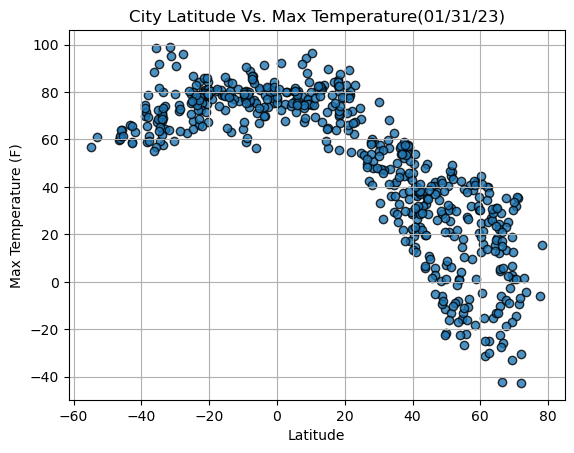

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

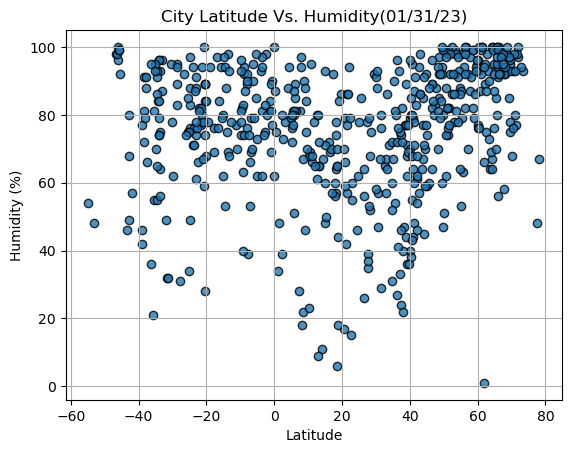

In [12]:
# Build scatter plot for latitude vs. Humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

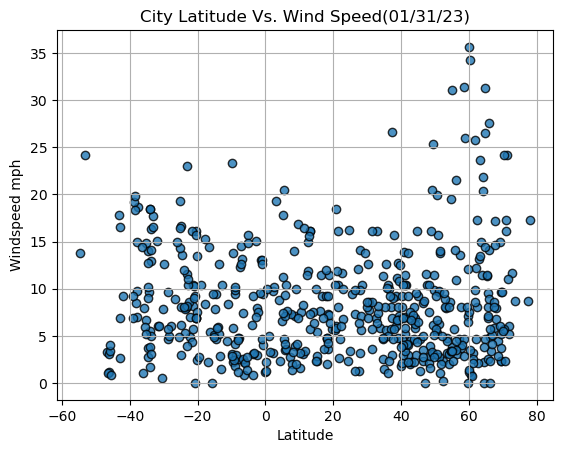

In [16]:

# Build scatter plot for latitude vs. Windspeed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

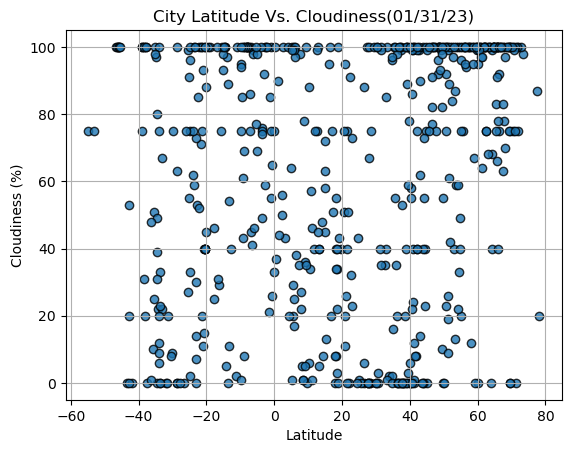

In [14]:
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("../output_data/Fig3.png")

# Show plot

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,kodiak,57.7900,-152.4072,38.71,87,100,8.05,US,1675193515
4,hilo,19.7297,-155.0900,77.29,86,40,5.75,US,1675193504
5,lagoa,39.0500,-27.9833,56.73,68,89,12.71,PT,1675193417
6,oistins,13.0667,-59.5333,80.69,65,40,16.11,BB,1675193712
7,provideniya,64.3833,-173.3000,15.42,100,68,2.17,RU,1675193579


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
1,hualmay,-11.0964,-77.6139,76.15,70,100,8.41,PE,1675193711
2,cape town,-33.9258,18.4232,70.88,79,75,18.41,ZA,1675193223
3,puerto ayora,-0.7393,-90.3518,84.16,90,65,4.00,EC,1675193533
8,lebu,-37.6167,-73.6500,61.61,66,0,18.66,CL,1675193522
9,padang,-0.9492,100.3543,75.25,89,100,4.63,ID,1675193713


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8311674129358388


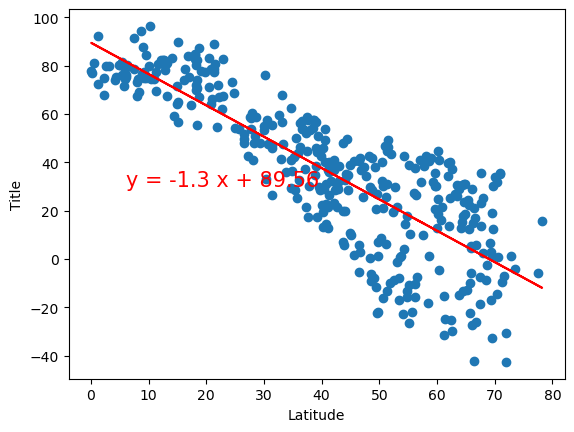

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.44060861527000156


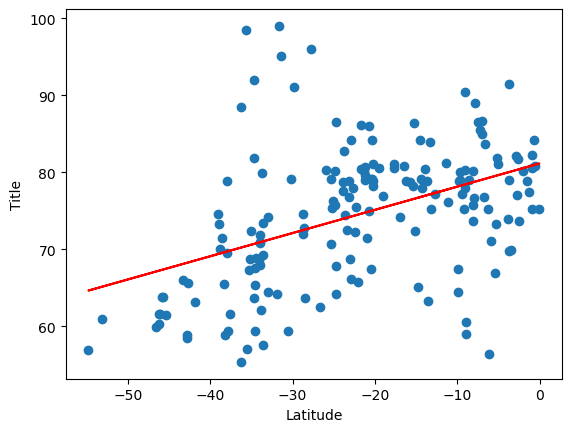

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** This plot shows Cloudiness vs. Latitude plot for cities in the southern hemisphere. The data points seems to show no relationship between cloudiness and latitude for the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.41325197619775056


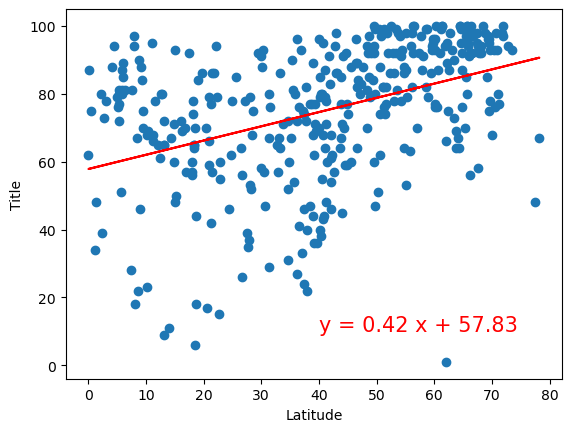

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.13283356269995392


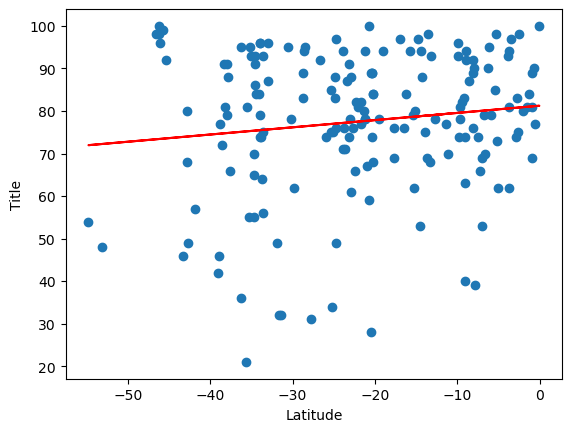

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.3671160114267643


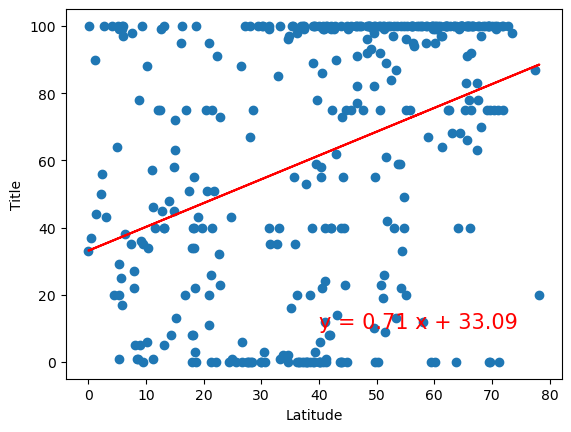

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.21911506049991084


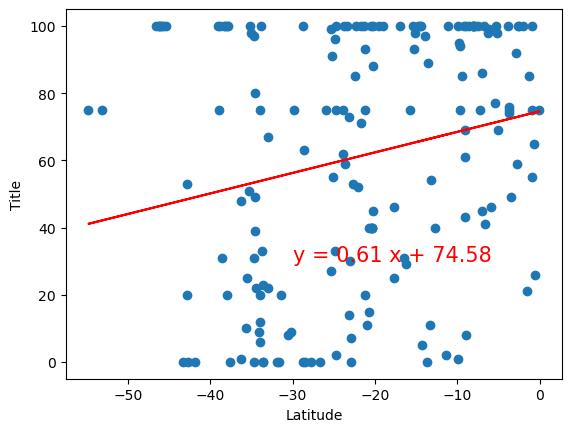

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.11339730556039951


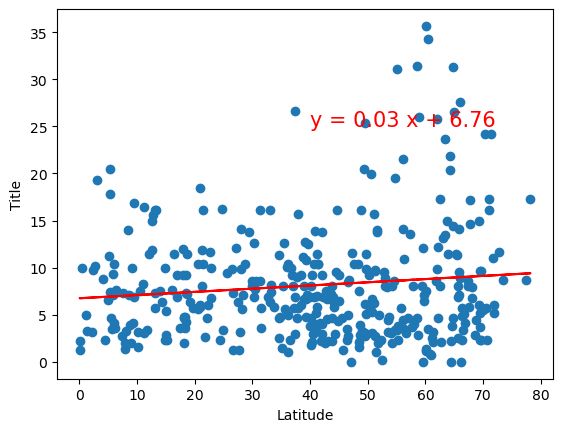

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

The r-squared is: -0.19533370144902198


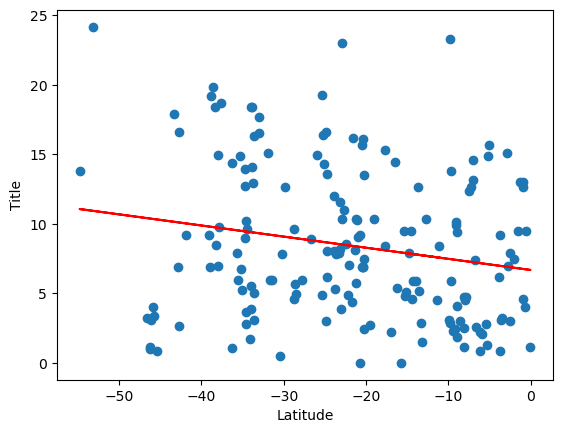

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))

**Discussion about the linear relationship:** The Wind Speed vs. Latitude plot for cities in the southern hemisphere is shown above. The data seems to show no relationship between wind speed and latitude for the southern hemisphere.